<a href="https://colab.research.google.com/github/mayaramesh/EART119/blob/master/July_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Plotting Domain  C Domain
Plotting Domain  Paraelectric Phase


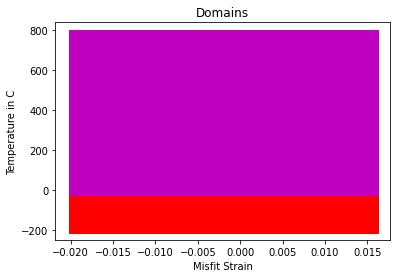

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
from sympy import *

# CONSTANTS - can be added to a textfile later
a11 = -7.3*1e7
a12 = 7.5*1e8
a111 = 2.6*1e8
a112 = 6.1*1e8
a123 = -3.7*1e9
Q11 = 0.089
Q12 = -0.026
Q44 = 0.0675
s11 = 8.0*1e-12
s12 = -2.5*1e-12
s44 = 9.0*1e-12
Tc = 479
eo = 8.85*1e-12
"""
a11s = a11 + 0.5*(1/((s11**2-s12**2)))*((Q11**2 + Q12**2)*s11-2*Q11*Q12*s12)
a33s = a11 + Q12**2/(s11+s12)
a33ss = a11 + (Q12**2)/(2*s11)
a12s = a12 - ((1/(s11**2-s12**2))*((Q11**2+Q12**2)*s12 - 2*Q11*Q12*s11))+Q44**2/(2*s44)
a13s = a12 + Q12*(Q11+Q12)/(s11+s12)
"""
# need to find what these are
E1 = 0
E2 = 0
E3 = 0
o1 = 0
o2 = 0
o3 = 0
o4 = 0
o5 = 0
o6 = 0

#DOMAINS
# List of domains, each domain is a list [domainName, color, xlist, ylist]
domainList = [["C Domain", "rs",[],[]], ["A domain", "orange", [], []],["AC Domain", "gs",[],[]], ["AA Domain", "bs",[],[]], ["R Domain", "ys",[],[]], ["Paraelectric Phase","ms",[],[]]]

# VARIABLES/LISTS:
# Sm = range (-5*1e-3, 5*1e-3, 1*1e-3)
sm_list = []
for sm in range (-20, 16, 1):
  for i in range (0,10,1):
    sm_list.append(sm*1e-3 + i*1e-4)
  """
  sm_list.append(sm*1e-3)
  sm_list.append(sm*1e-3 + .0001)
  sm_list.append(sm*1e-3 + .0002)
  sm_list.append(sm*1e-3 + .0003)
  sm_list.append(sm*1e-3 + .0004)
  sm_list.append(sm*1e-3 + .00050)
  sm_list.append(sm*1e-3 + .00060)
  sm_list.append(sm*1e-3 + .00070)
  sm_list.append(sm*1e-3 + .00080)
  sm_list.append(sm*1e-3 + .00090)
  """

temp_list = []
for temp in range (-200, 800, 10):
  temp_list.append(temp)

"""
ps_list = []
for a3ss in a3ss_list:
  ps_list.append(-(a33ss/(3*a111)) + ((a33ss**2/(9*(a111**2))-(a3ss/(3*a111)))**(1/2)))
"""

def c_free_energy(T, sm, a1):
  # c domain - P1=P2=0, P3!=0
  #c_p = [0,0,P3]
  # remember to change this!!!!!
  P3 = 1
  # with E's: f_c = a1*(P3**2) + a11*(P3**4) + a111*(P3**6) - (0.5)*s11*(o1**2 + o2**2 + o3**3) + s12*(o1*o2 + o2*o3 + o1*o3) + (0.5)*s44*(o4**2 + o5**2 + o6**2) - (0.5)*eo*(E1**2 + E2**2 + E3**2) - E3*P3
  f_c = a1*(P3**2) + a11*(P3**4) + a111*(P3**6) - (0.5)*s11*(o1**2 + o2**2 + o3**3) + s12*(o1*o2 + o2*o3 + o1*o3) + (0.5)*s44*(o4**2 + o5**2 + o6**2)
  # find deriv
  # find smallest f using pmin
  return f_c

def a_free_energy(T, sm, a1):
  # a domain - P1!=0, P2=P3=0
  #a_p = [P1,0,0]
  # remember to change this!!!!!
  P1 = 1
  # with E's f_a =  a1*(P1**2) + a11*(P1**4) + a111*(P1**6) - (0.5)*s11*(o1**2 + o2**2 + o3**3) + s12*(o1*o2 + o2*o3 + o1*o3) + (0.5)*s44*(o4**2 + o5**2 + o6**2) - (0.5)*eo*(E1**2 + E2**2 + E3**2) - E1*P1
  f_a =  a1*(P1**2) + a11*(P1**4) + a111*(P1**6) - (0.5)*s11*(o1**2 + o2**2 + o3**3) + s12*(o1*o2 + o2*o3 + o1*o3) + (0.5)*s44*(o4**2 + o5**2 + o6**2)
  # find deriv 
  # find smallest f using pmin
  return f_a

def ac_free_energy(T, sm, a1):
  # ac domain - P1!=0, P2=0, P3!=0
  #ac_p = [P1,0,P3]
  # remember to change this!!!!!
  P1 = 1
  P3 = 1
  # from Pertsev 2001:
  o3 = 0
  o4 = 0
  o5 = 0
  o6 = 0
  # with E's f_ac = a1*(P1**2 + P3**2) + a11*(P1**4 + P3**4) + a12*(P1**2*P3**2) + a111*(P1**6 + P3**6) + a112*(P1**4*P3**2 + P3**4*P1**2) - (0.5)*s11*(o1**2 + o2**2 + o3**3) + s12*(o1*o2 + o2*o3 + o1*o3) + (0.5)*s44*(o4**2 + o5**2 + o6**2) - (0.5)*eo*(E1**2 + E2**2 + E3**2) - E1*P1 - E3*P3
  f_ac = a1*(P1**2 + P3**2) + a11*(P1**4 + P3**4) + a12*(P1**2*P3**2) + a111*(P1**6 + P3**6) + a112*(P1**4*P3**2 + P3**4*P1**2) - (0.5)*s11*(o1**2 + o2**2 + o3**3) + s12*(o1*o2 + o2*o3 + o1*o3) + (0.5)*s44*(o4**2 + o5**2 + o6**2)
  # find deriv
  # find smallest f using pmin
  return f_ac

def aa_free_energy(T, sm, a1):
  # aa domain - P1=P2!=0, P3=0 
  #aa_p = [P,P,0]
  # remember to change this!!!!!
  P = 1
  # from Pertsev 2001:
  o3 = 0
  o4 = 0
  o5 = 0
  o6 = 0
  #o1 = (sm - 0.5*(Q11+Q12)*Ps**2)/(s11+s12)
  # where Ps is NOT P squared!
  # f_aa = a1*(P1**2 + P2**2) + a11*(P1**4 + P2**4) + a12*(P1**2*P2**2) + a111*(P1**6 + P2**6) + a112*(P1**4*P2**2 + P2**4*P1**2) - (0.5)*s11*(o1**2 + o2**2 + o3**3) + s12*(o1*o2 + o2*o3 + o1*o3) + (0.5)*s44*(o4**2 + o5**2 + o6**2) - (0.5)*eo*(E1**2 + E2**2 + E3**2) - E1*P1 - E2*P2
  # but P1=P2=P so
  # with E's: f_aa = a1*(2*P**2) + a11*(2*P**4) + a12*(P**4) + a111*(2*P**6) + a112*(2*P**6) - (0.5)*s11*(o1**2 + o2**2 + o3**3) + s12*(o1*o2 + o2*o3 + o1*o3) + (0.5)*s44*(o4**2 + o5**2 + o6**2) - (0.5)*eo*(E1**2 + E2**2 + E3**2) - E1*P - E2*P
  f_aa = a1*(2*P**2) + a11*(2*P**4) + a12*(P**4) + a111*(2*P**6) + a112*(2*P**6) - (0.5)*s11*(o1**2 + o2**2 + o3**3) + s12*(o1*o2 + o2*o3 + o1*o3) + (0.5)*s44*(o4**2 + o5**2 + o6**2)
  # find deriv
  # find smallest f using pmin
  return f_aa

def r_free_energy(T, sm, a1):
  # r domain - P1=P2!=0, P3!=0
  #r_p = [P,P,P3]
  # remember to change this!!!!!
  P = 1
  P3 = 1
  # with E's: f_r = a1*(2*P**2 + P3**2) + a11*(2*P**4 + P3**4) + a12*(P**4 + 2*P**2*P3**2) + a111*(2*P**6 + P3**6) + a112*(P**4*(P**2 + P3**2) + P**4*(P3**2 + P**2) + P3**4*(2*P**2)) - (0.5)*s11*(o1**2 + o2**2 + o3**3) + s12*(o1*o2 + o2*o3 + o1*o3) + (0.5)*s44*(o4**2 + o5**2 + o6**2) - (0.5)*eo*(E1**2 + E2**2 + E3**2) - E1*P - E2*P - E3*P3
  f_r = a1*(2*P**2 + P3**2) + a11*(2*P**4 + P3**4) + a12*(P**4 + 2*P**2*P3**2) + a111*(2*P**6 + P3**6) + a112*(P**4*(P**2 + P3**2) + P**4*(P3**2 + P**2) + P3**4*(2*P**2)) - (0.5)*s11*(o1**2 + o2**2 + o3**3) + s12*(o1*o2 + o2*o3 + o1*o3) + (0.5)*s44*(o4**2 + o5**2 + o6**2)
  # find deriv
  # find smallest f using pmin
  return f_r

def pe_free_energy(T, sm, a1):
  # paraelectric domain - P1=P2=P3=0
  #p_p = [0,0,0]
  # with E's: f_p = - (0.5)*s11*(o1**2 + o2**2 + o3**3) + s12*(o1*o2 + o2*o3 + o1*o3) + (0.5)*s44*(o4**2 + o5**2 + o6**2) - (0.5)*eo*(E1**2 + E2**2 + E3**2)
  f_p = - (0.5)*s11*(o1**2 + o2**2 + o3**3) + s12*(o1*o2 + o2*o3 + o1*o3) + (0.5)*s44*(o4**2 + o5**2 + o6**2)
  # find deriv 
  # find smallest f using pmin
  return f_p

def loopThroughA1s (sm, templist):
  for temp in templist:
    a1 = 3.8*(temp-Tc)*1e5
    """
    a3ss = a1-(Q12/s11)*sm
    a1s = (a1-((Q11+Q12)/(s11+s12))*sm)
    a3s = (a1-((2*Q12)/(s11+s12))*sm)
    """
    #Do we need temp in the following?  If not remove from the freeEnergy 
    fEs = [c_free_energy(temp, sm, a1), a_free_energy(temp, sm, a1), ac_free_energy(temp, sm, a1), 
            aa_free_energy(temp, sm, a1), r_free_energy(temp, sm, a1), pe_free_energy(temp, sm, a1)]
    index = findLowestDomainIndex(fEs)
    addPointToDomain(domainList[index], [sm, temp])
   
def loopThroughSms (smList, templist):    
  for sm in smList :
    loopThroughA1s(sm, templist)

#addPointToDomain: domain(list like above) and point (a list of x and y coordinates(eg. [0.1, 5])
def addPointToDomain(domain, point):
    domain[2].append(point[0])
    domain[3].append(point[1])
    
#addPointListToDomain: domain(a list) and points (list of x-y coordinate lists (eg. [[1,1], [2,2]])
def addPointListToDomain(domain, points):
    for i in range (0, len(points), 1):
        addPointToDomain(domain, points[i])
    
def printDomainPoints():
    print("\n***********\nNumber of Domains = ", len(domainList))
    for domain in domainList :
        print(". . . . . . . . . . ")
        print("Domain Name: ", domain[0], "    Domain Color: ", domain[1])
        print ("No. of points = ", len(domain[2]))
        for i in range (0,len(domain[2]),1):
            print("\tX = ", domain[2][i], "   Y = ", domain[3][i])
    print("\n***********\n")

def plotDomains():
    for domain in domainList :
        if len(domain[2]) : 
            print ("Plotting Domain ", domain[0])
            #plt.plot(domain[2],domain[3], domain[1])
            plt.plot(domain[2],domain[3], domain[1], marker="s", markersize=5)
    plt.xlabel("Misfit Strain")
    plt.ylabel("Temperature in C")
    plt.title('Domains')
    plt.show()

def findLowestDomainIndex (fEs):
    if (fEs):
        return fEs.index(min(fEs))
    else:
      return -1

def main():
  loopThroughSms(sm_list, temp_list)
  plotDomains()

if __name__ == "__main__":
    main()